# Drug Reviews
The objective of the project is to predict the sentiment of the drug users, according to their reviews, ratings, conditions and other features.

Explanation of variables:
* uniqueID: a unique id
* drugName: name of drug
* condition: name of the condition the patient is suffering from
* review: patient review
* rating: the patient's rating for the drug between 0-10 stars
* date: date of review entry
* usefulCount: number of users who upvoted the review


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualisation


In [3]:
df_train = pd.read_csv('drugsComTrain_raw.csv')
df_test = pd.read_csv('drugsComTest_raw.csv')
df_train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [4]:
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (161297, 7)
Test shape: (53766, 7)


In [5]:
all_data = pd.concat([df_train, df_test])
all_data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


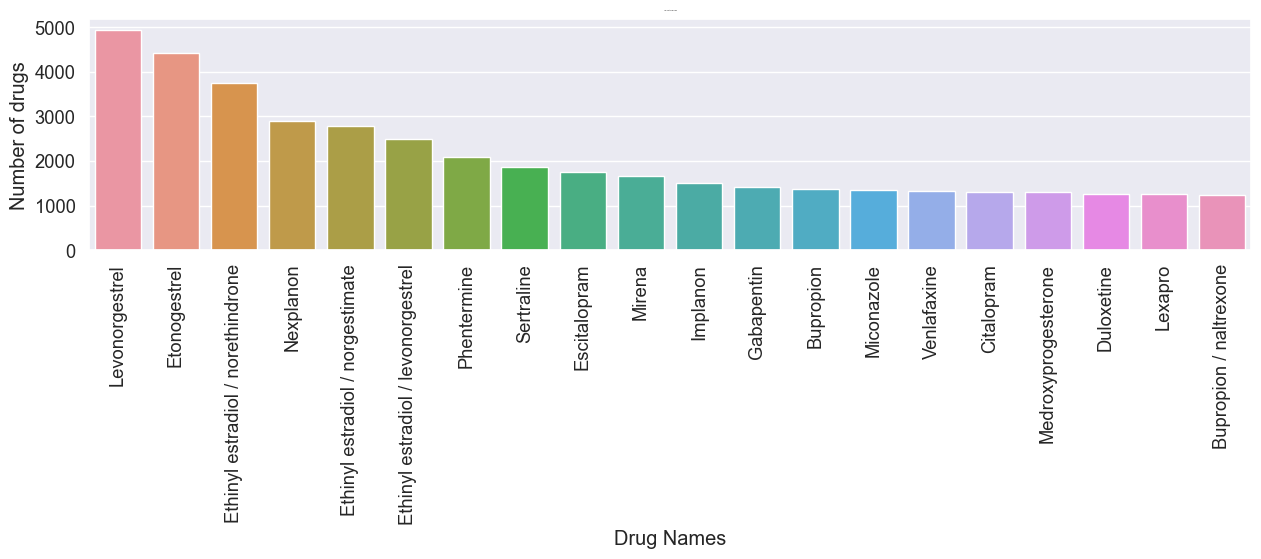

In [6]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 3]
drugs = all_data.pivot_table(index = ['drugName'], aggfunc = 'size')
drugs_sorted = drugs.sort_values(ascending=False)
drugs = drugs_sorted.head(20)

sns_drugs = sns.barplot(x = drugs.index, y = drugs.values)
sns.set(font_scale = 0.01)
sns_drugs.set_title('The most used drugs')
sns_drugs.set_ylabel("Number of drugs")
sns_drugs.set_xlabel("Drug Names")
plt.setp(sns_drugs.get_xticklabels(), rotation=90);


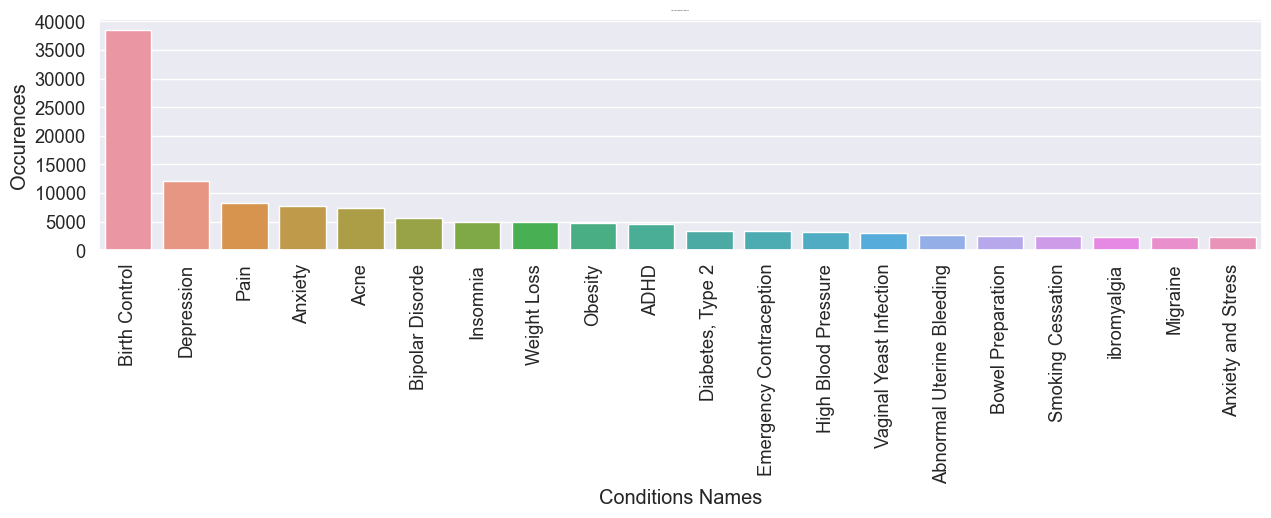

In [7]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15,3]

conditions = all_data.pivot_table(index = ['condition'], aggfunc='size')
conditions_sorted = conditions.sort_values(ascending = False)
conditions = conditions_sorted.head(20)

sns_conditions = sns.barplot(x = conditions.index, y = conditions.values)
sns.set(font_scale = 0.01)
sns_conditions.set_title('The most common conditions')
sns_conditions.set_ylabel("Occurences")
sns_conditions.set_xlabel("Conditions Names")
plt.setp(sns_conditions.get_xticklabels(), rotation=90);

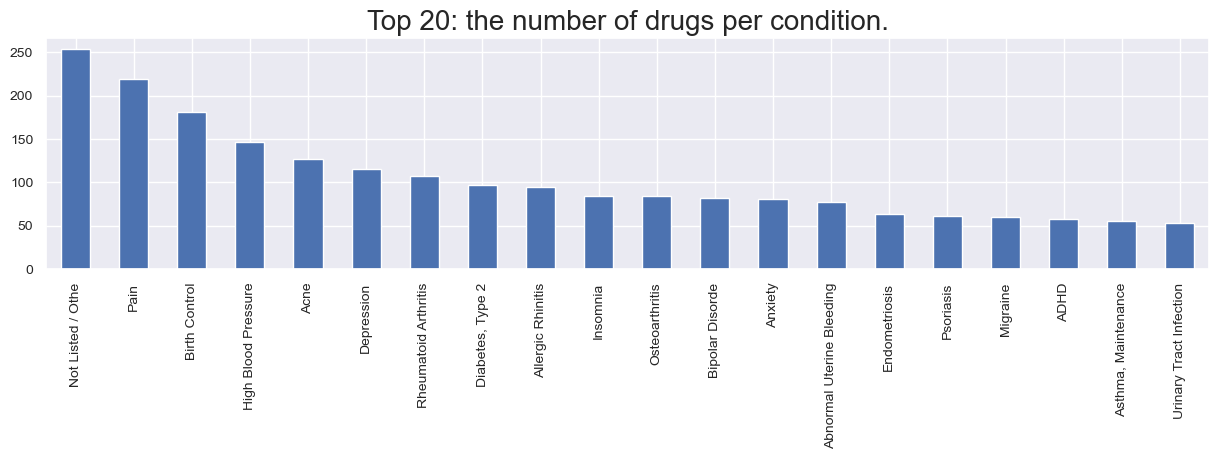

In [9]:
data = all_data
data = data[data["condition"].str.contains("users found") == False]
# nunique() function counts the number of unique entries in a column of a dataframe
condDrug = data.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False)
condDrug.head(20).plot(kind = 'bar', figsize = (15, 3), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top 20: the number of drugs per condition.", fontsize = 20)
plt.show()

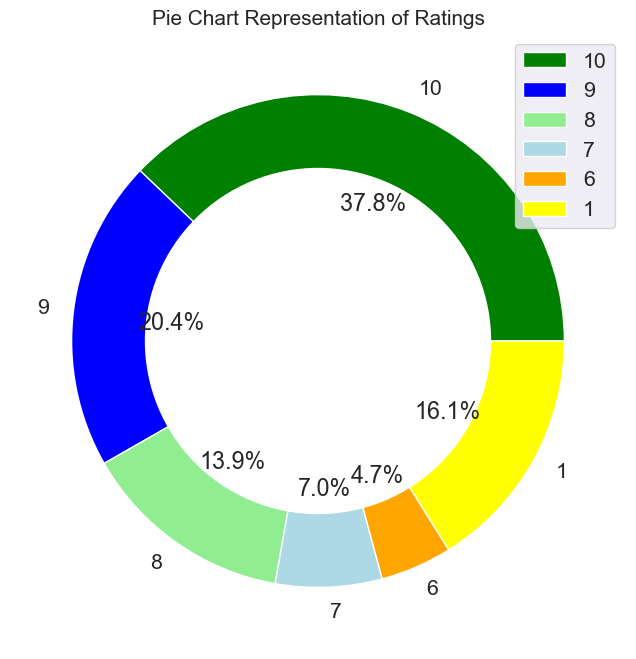

In [31]:
# a donut chart that represents the ratings of the drugs
data = [all_data['rating'].value_counts()[10], all_data['rating'].value_counts()[9],all_data['rating'].value_counts()[8],all_data['rating'].value_counts()[7],all_data['rating'].value_counts()[6],all_data['rating'].value_counts()[1]]
colors = ['green', 'blue', 'lightgreen', 'lightblue', 'orange', 'yellow']
label = "10", "9", "8", "7", "6", "1"

my_circle = plt.Circle((0,0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(data, colors = colors, labels = label, autopct = '%1.1f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 15)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend(label, loc = "best")
plt.show()

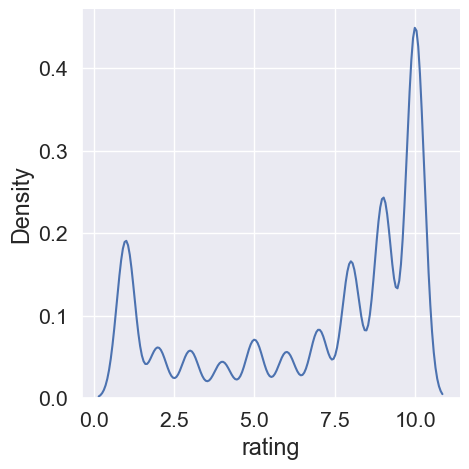

In [57]:
#the distribution of ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')

sns_1 = sns.displot(data = all_data['rating'], kind="kde")


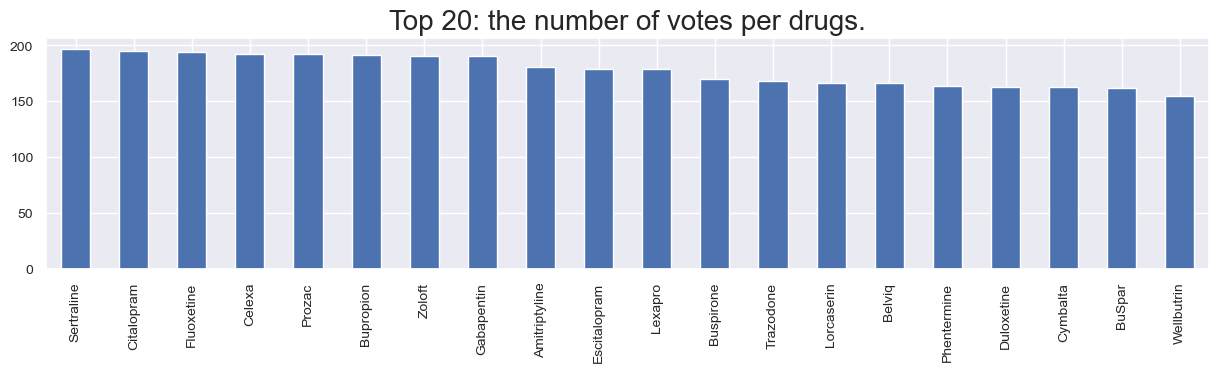

In [60]:
data = all_data
# nunique() function counts the number of unique entries in a column of a dataframe
condDrug = data.groupby(['drugName'])['usefulCount'].nunique().sort_values(ascending = False)
condDrug.head(20).plot(kind = 'bar', figsize = (15, 3), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top 20: the number of votes per drugs.", fontsize = 20)
plt.show()